# Coarse-grain a simple transition matrix

To illustrate the application of *pyGPCCA* we will coarse-grain a simple toy example transition matrix *P*. 

Firstly, we will import needed packages like ``numpy`` and of course ``pygpcca``:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pygpcca as gp

Next, we define a simple row-stochastic (meaning that the rows of *P* each sum up to one) transition matrix *P* and plot it:

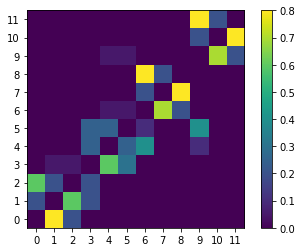

In [2]:
P = np.array(
    [
    # 0.   1.   2.   3.   4.   5.   6.   7.   8.   9.   10.  11.   
    [0.0, 0.8, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #0
    [0.2, 0.0, 0.6, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #1
    [0.6, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #2
    
    [0.0, 0.05, 0.05, 0.0, 0.6, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], #3
    [0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.4, 0.0, 0.0, 0.1, 0.0, 0.0], #4
    [0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.1, 0.0, 0.0, 0.4, 0.0, 0.0], #5
    
    [0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.0, 0.7, 0.2, 0.0, 0.0, 0.0], #6
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.8, 0.0, 0.0, 0.0], #7
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0, 0.0, 0.0], #8
    
    [0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.7, 0.2], #9
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.8], #10
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0], #11
    ],
    dtype=np.float64,
)

# plot the matrix P:
fig, ax = plt.subplots()
c = ax.imshow(P)
plt.xticks(np.arange(P.shape[1]))
plt.yticks(np.arange(P.shape[0]))
plt.ylim(-0.5, P.shape[0]-0.5)
fig.colorbar(c)
plt.show()

Following this, we initialize a *GPCCA* object from the transition matrix *P*:

In [3]:
gpcca = gp.GPCCA(P)

Afterwards, we can get a list of *minChi* values for numbers of macrostates *m* in an interval *\[2, 11\]* to determine an interval
*\[m_min, m_max\]* of (nearly) optimal numbers of macrostates for clustering:

In [5]:
gpcca.minChi(2, 11)

[-1.6653345369377348e-16,
 -2.255418698866725e-16,
 -0.050736153733740706,
 -0.9751842166465493,
 -0.9751842166465485,
 -0.8177242150254587,
 -0.33604479452159325,
 -0.297303618630627,
 -0.2910404757551534,
 -0.42902208201892694]

This might result in a warning:

```
/home/breuter/g-pcca/pyGPCCA/pygpcca/_sort_real_schur.py:106: ComplexWarning: Casting complex values to real discards the imaginary part
  p[k] = R[sk, sk] + np.lib.scimath.sqrt(R[sk + 1, sk] * R[sk, sk + 1])  # store the eigenvalues
```
  
This is uncritical and has merely technical reasons.

The *minChi* citerion states that cluster numbers *m* (i.e. clustering into *m* clusters) with a *minChi* value close to zero will potentially result in a optimal (meaning especially *crisp* or sharp) clustering.
Obviously, *m*=3 qualifies as non-trivially (potentially) optimal, since *m*=2 is always (trivially) optimal.
Futher *m*=4 might also qualify as a good cluster number, since the associated *minChi* value is also quite close to zero.

Now, we optimize the clustering for numbers of macrostates *m* in the previously determined interval *\[m_min, m_max\]* and find the optimal number of macrostates *n_metastable* in the given interval: 

In [6]:
gpcca.optimize({'m_min':2, 'm_max':4})

GPCCA[n=12, n_metastable=3]

The optimized *GPCCA* object is returned above and we can now access different properties of it.

The optimal number of macrostates *n_metastable* can be accessed via:

In [7]:
gpcca.n_metastable

3

The optimal number of clusters or macrostates is *n_metastable*=3 as expected.

The optimal coarse-grained matrix can be accessed via:

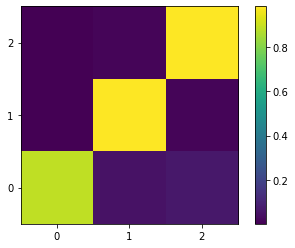

array([[0.88647796, 0.04980224, 0.0637198 ],
       [0.00243516, 0.98097945, 0.01658538],
       [0.00243516, 0.01543652, 0.98212831]])

In [8]:
P_c = gpcca.coarse_grained_transition_matrix
# plot P_c:
fig, ax = plt.subplots()
c = ax.imshow(P_c)
plt.xticks(np.arange(P_c.shape[1]))
plt.yticks(np.arange(P_c.shape[0]))
plt.ylim(-0.5, P_c.shape[0]-0.5)
fig.colorbar(c)
plt.show()
# show P_c matrix:
P_c

The memberships are available via:

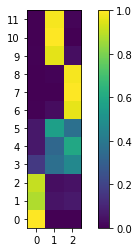

array([[1.00000000e+00, 0.00000000e+00, 8.44548736e-18],
       [8.80009662e-01, 5.26338400e-02, 6.73564979e-02],
       [9.12351139e-01, 3.84758290e-02, 4.91730323e-02],
       [1.64953404e-01, 3.67067094e-01, 4.67979502e-01],
       [6.51588802e-02, 3.35927186e-01, 5.98913934e-01],
       [6.51588802e-02, 5.64708356e-01, 3.70132763e-01],
       [5.02066367e-03, 3.27724659e-02, 9.62206870e-01],
       [1.27462550e-16, 1.83492669e-16, 1.00000000e+00],
       [1.78878958e-03, 1.11025375e-02, 9.87108673e-01],
       [5.02066367e-03, 9.59750248e-01, 3.52290885e-02],
       [0.00000000e+00, 1.00000000e+00, 2.42354345e-17],
       [1.78878958e-03, 9.86286754e-01, 1.19244563e-02]])

In [9]:
chi = gpcca.memberships
# plot chi:
fig, ax = plt.subplots()
c = ax.imshow(chi)
plt.xticks(np.arange(chi.shape[1]))
plt.yticks(np.arange(chi.shape[0]))
plt.ylim(-0.5, chi.shape[0]-0.5)
fig.colorbar(c)
plt.show()
# show chi matrix:
chi

There are many more properties that can be accessed as you can see in the API documentation <a href="https://pygpcca.readthedocs.io/en/latest/api/pygpcca.GPCCA.html" target="_blank">here</a>.